In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("text-generation", model="Universal-NER/UniNER-7B-all")

In [3]:
# pipe("Widowed and ailing Savitri Choudhury lives a wealthy lifestyle.")

In [6]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [7]:
text = """
Satyaprem "Sattu" is a unhappy lower middle class boy,who is a law failed student and lives in a Gujarati middle class family in Gujarat alongwith his parents and a younger sister in a small house. Unlike other houses,his mother and sister are the earning member in their house so he and his father are both unemployed so they are tasked to do all the household chores. Sattu is frustrated as he is the only remaining bachelor in his neighbourhood .The last bachelor of his neighbour is also getting married inspite of being several years younger than Sattu.After many requests also,his mother declines to find a bride for him giving the reason that no girl will marry a jobless boy like him.But his mother is busy in finding a groom for her daughter,which left Sattu in jealousy.Both his mother and sister misbehave with him and it was only his father who understand his feelings.Sattu informs his father that he is still in love with the girl who he had seen a few years ago at the Garba.

A flashback occurs which shows in a garba celebration, Sattu gets mesmerized on seeing the dance of a girl named Katha. However, he is heartbroken on learning that she is already in a relationship with a man named Tapan.

One year later, Sattu gets to know that Katha has broken up with Tapan and that her parents are looking for a suitable marriage alliance. He visits the Garba celebration again with his father, Narayan, hoping to see Katha's dance again. There they meet Katha's father, Harikishen, a wealthy businessman who owns a popular snack shop, along with her mother and her younger sister, Kinjal. He learns from them that Katha is sick, and after some persuasion from Narayan, he goes to see her at her home. Upon arriving, he is shocked to see that she tried to commit suicide by slitting her wrist. He rushes her to the hospital immediately. Katha recovers, but is angry at Sattu for saving her. When Katha's family arrives at the hospital, Harikishen scolds her, saying that she should have rather died. Later that night, Katha thanks Sattu for saving her life through a text message. The next day, Sattu visits Katha to gift her flowers and to make sure she is doing well.

A few days pass, and Katha's parents bring a marriage proposal for Katha to Sattu's house. Sattu becomes overjoyed and accepts the alliance. Katha, on the other hand, is unhappy, but reluctantly agrees to the marriage as Harikishen threatens to kill himself if she does not get married. After the marriage, Sattu tries to get intimate with Katha but she is not interested in getting intimate at all and is uncomfortable with sharing the same bed with Sattu, saying that his snoring disturbs her sleep. This results in Sattu having to sleep separately and tries various remedies to fix his snoring problem. One night, Sattu angrily lashes out at her, and questions if she is really uncomfortable with his snoring or if that is just an excuse to not be intimate with him. Katha admits she was lying, and tells him that she is asexual and does not feel the desire to have sex or get intimate, leaving Sattu shocked.

Frustrated, Sattu tells Harikishen the next day that if the situation does not improve, he will end the marriage and get a divorce. Harikishen advises him to give her some more time to warm up to him and that Sattu should try to make her feel comfortable. Following the advice, Sattu tries to win her affection. He buys her gifts and takes her out on dates. Their relationship improves and Katha reveals that she had lied about being asexual, but that she doesn't feel comfortable explaining the real reason why she doesn't want to sleep with Sattu. Sattu understands, reiterating that he will be there for her regardless. She also encourages him to attempt the law examination again. One night, Katha and Sattu finally try and get intimate, but it results in Katha having an emotional breakdown, due to a past trauma.

It is revealed that Tapan had raped Katha the previous year after the Garba celebration. She had become pregnant and had to get an abortion. Katha's family never told anyone of the incident, fearing the shame it would bring for them in the society, and had disowned Katha. Due to all this, Katha is not comfortable in being intimate with anyone. Sattu is furious on learning all this and confronts Harikishen regarding the matter. He then heads to Tapan's workplace and brutally thrashes him. Sattu's family is also left in shock after knowing everything but decide to keep the matter among themselves. Later, Sattu and Katha leave for Kashmir for their honeymoon, now more deeply in love with each other. Katha is still unable to get intimate with Sattu, due to her trauma. Sattu understand and gives her the space to cope with her past.

On the day of Satyanarayan Puja at Katha's house, Sattu arrives after registering an FIR against Tapan. Sattu brings the papers to Katha to sign them, encouraging her to fight for herself. With renewed hope and love for each other, Sattu and Katha perform the puja together and start their fight against Tapan in the court. Sattu finally obtains his law degree, while Katha starts healing slowly with Sattu's constant support."""
docs = nlp(text)


In [91]:
import spacy

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Sample complex sentence
sentence = "Satyaprem is a Gujarati who loves Garba."

# Process the sentence with SpaCy
doc = nlp(sentence)

# Iterate over the tokens to identify clause boundaries
clauses = []
current_clause = []
current_subject = None
for token in doc:
    print(token)
    if token.text in [",", ";", "and", "who", "what", "which", "that"]:
        # If the token is a punctuation indicating a clause boundary, add the current clause to the list
        clauses.append((current_subject, " ".join(current_clause)))
        current_clause = []
#         current_subject = None
    elif token.dep_ in ["nsubj", "nsubjpass"]:
        # If the token is a subject, update the current subject
        current_subject = token.text
    else:
        # Add the token to the current clause
        current_clause.append(token.text)

# Add the last clause (if any) to the list
if current_clause:
    clauses.append((current_subject, " ".join(current_clause)))

# Print the resulting clauses with subjects
for subject, clause in clauses:
    print(f"{subject}: {clause}")


Satyaprem
is
a
Gujarati
who
loves
Garba
.
Satyaprem: is a Gujarati
Satyaprem: loves Garba .


In [92]:
sentences = []
import spacy

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

for sentence in docs.sents:
    clauses = []
    current_clause = []
    current_subject = None
    for token in sentence:
        if token.text in [",", ";", "and", "who", "what", "which", "that"]:
            # If the token is a punctuation indicating a clause boundary, add the current clause to the list
            clauses.append((current_subject, " ".join(current_clause)))
            current_clause = []
    #         current_subject = None
        elif token.dep_ in ["nsubj", "nsubjpass"]:
            # If the token is a subject, update the current subject
            current_subject = token.text
        else:
            # Add the token to the current clause
            current_clause.append(token.text)

    # Add the last clause (if any) to the list
    if current_clause:
        clauses.append((current_subject, " ".join(current_clause)))

    # Print the resulting clauses
    # Print the resulting clauses with subjects
    for subject, clause in clauses:
        sentences.append(f"{subject} {clause}")
        


In [93]:
candidate_sentences = pd.DataFrame(sentences,columns=["sentence"]).reset_index()
candidate_sentences.shape

(153, 2)

In [113]:
candidate_sentences = candidate_sentences[~(
    candidate_sentences['sentence'].str.contains('Sattu|Katha|None Later|None One night')
    | (candidate_sentences['sentence'] == "Sattu") | (candidate_sentences['sentence'] == "Katha")
)]


index  sentence                         
5      None Unlike other houses             1
98     Harikishen                           1
96     he get a divorce .                   1
95     he will end the marriage             1
94     situation if the does not improve    1
                                           ..
40     they owns a popular snack shop       1
39     they a wealthy businessman           1
38     they Harikishen                      1
35     He Narayan                           1
147    None love for each other             1
Name: count, Length: 82, dtype: int64

In [67]:
displacy.render(docs, style="ent")

Satyaprem is a Gujarati
loves Garba .


In [114]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 82/82 [00:00<00:00, 139.43it/s]


In [115]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [116]:
get_relation("Satyaprem is a Gujarati who loves Garba")

'is'

In [117]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 82/82 [00:00<00:00, 125.10it/s]


In [118]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [119]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

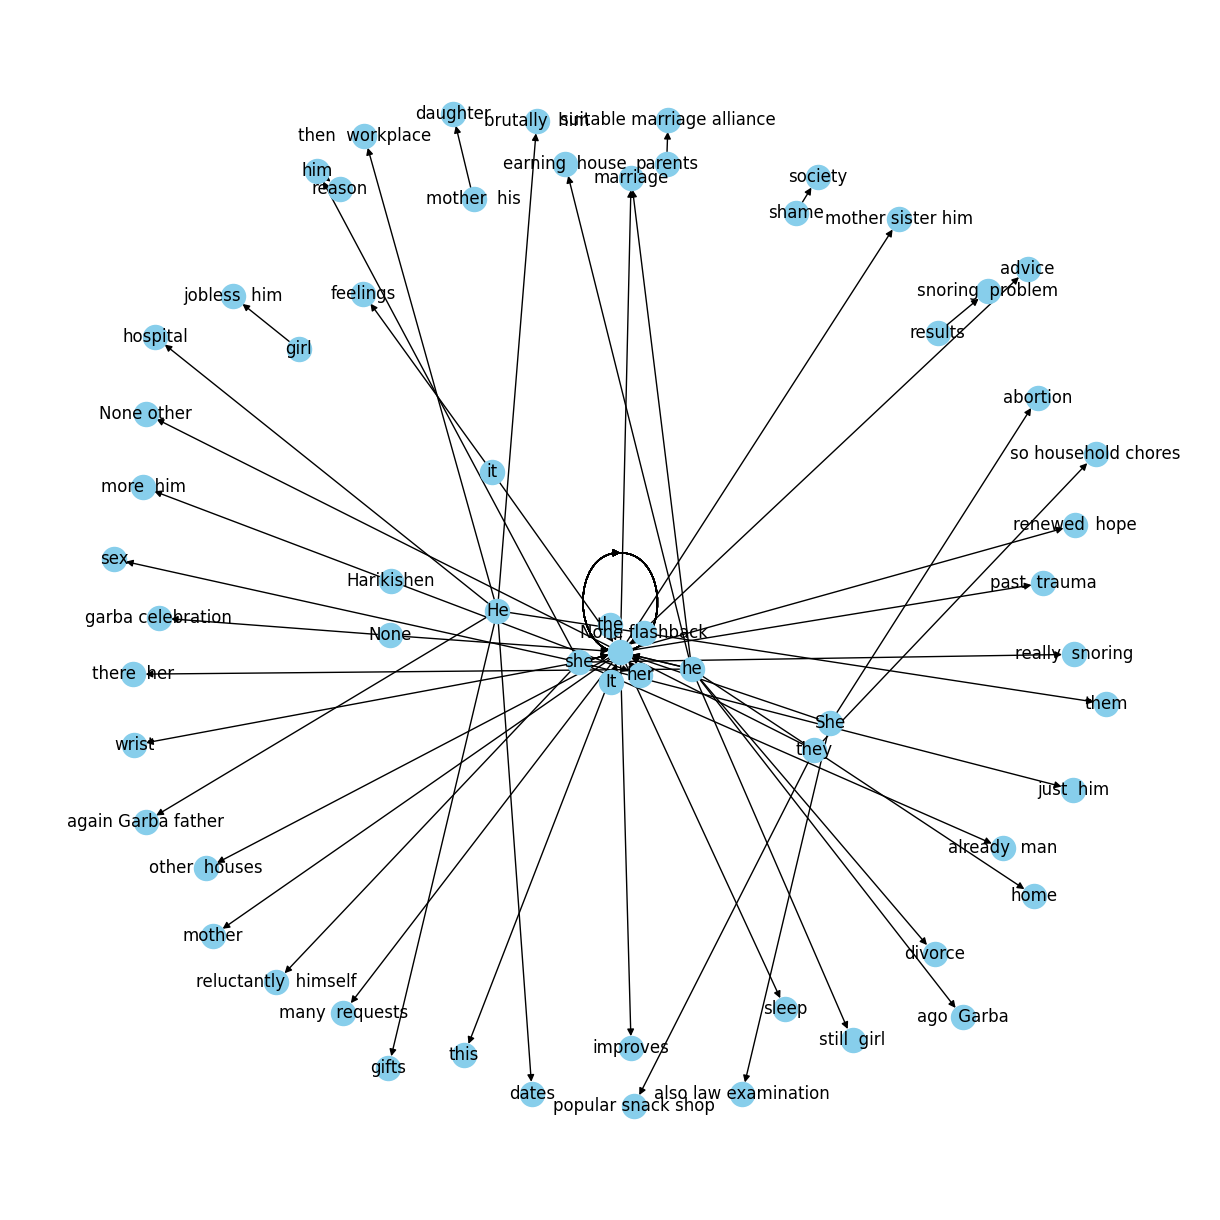

In [120]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [54]:
docs2 = nlp(text2)
sentences = []
for sentence in docs2.sents:
    sentences.append(sentence.text)
candidate_sentences = pd.DataFrame(sentences,columns=["sentence"]).reset_index()
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

100%|██████████| 34/34 [00:00<00:00, 96.99it/s]


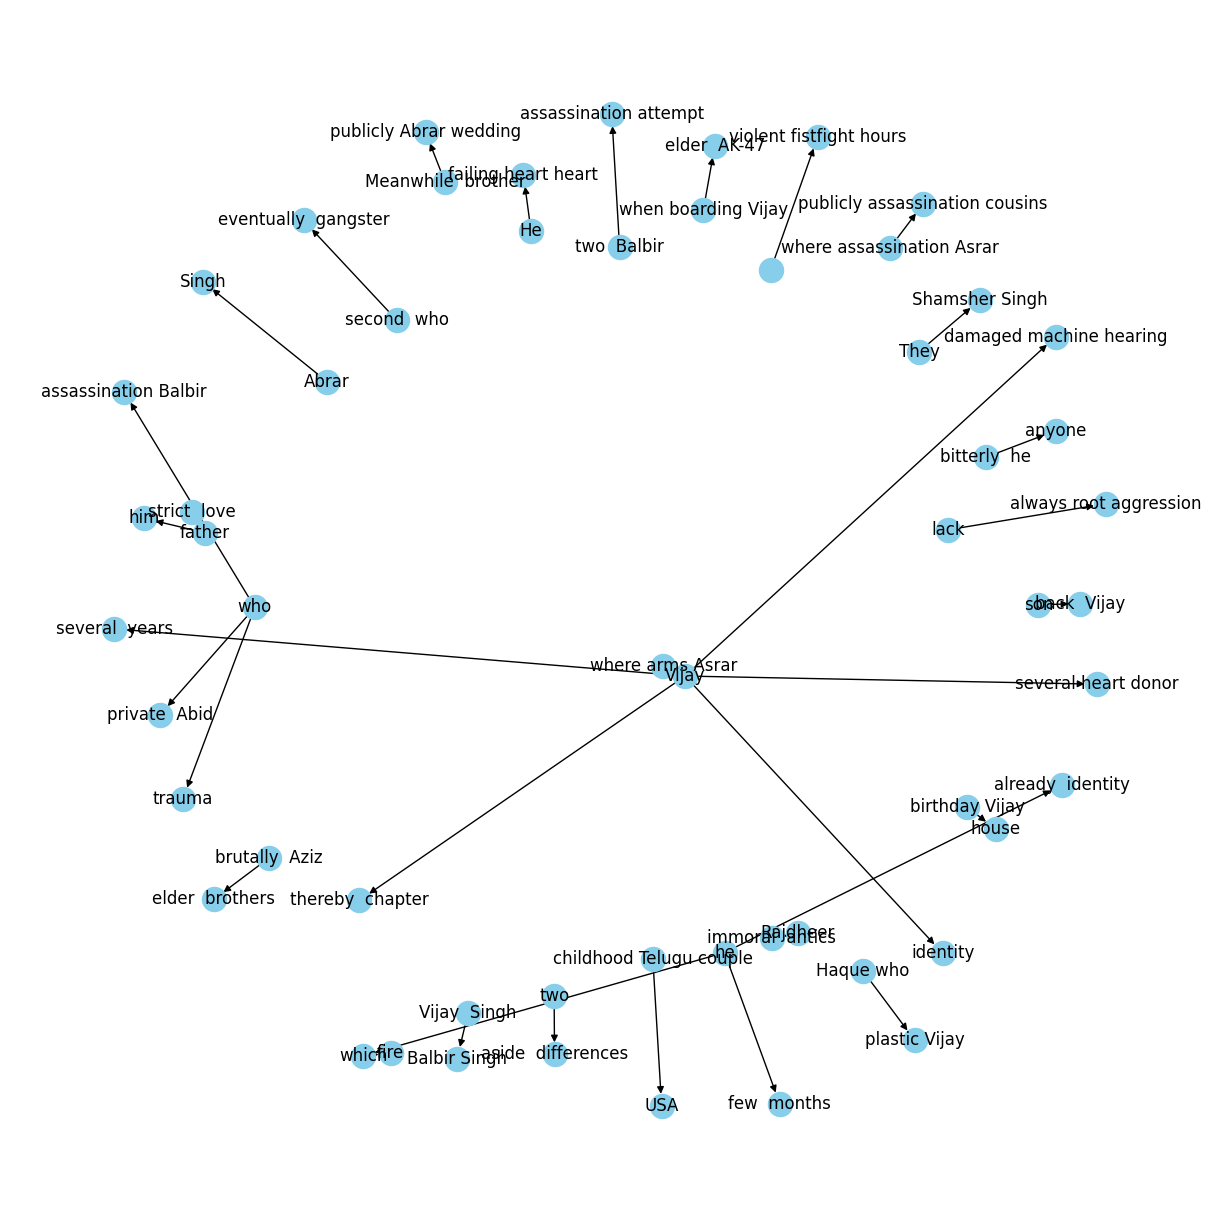

In [55]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Protagonist Knowlege Graph

In [140]:
import spacy

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Sample text (replace with your text)
text = """
Satyaprem "Sattu" is a unhappy lower middle class boy,who is a law failed student and lives in a Gujarati middle class family in Gujarat alongwith his parents and a younger sister in a small house. Unlike other houses,his mother and sister are the earning member in their house so he and his father are both unemployed so they are tasked to do all the household chores. Sattu is frustrated as he is the only remaining bachelor in his neighbourhood .The last bachelor of his neighbour is also getting married inspite of being several years younger than Sattu.After many requests also,his mother declines to find a bride for him giving the reason that no girl will marry a jobless boy like him.But his mother is busy in finding a groom for her daughter,which left Sattu in jealousy.Both his mother and sister misbehave with him and it was only his father who understand his feelings.Sattu informs his father that he is still in love with the girl who he had seen a few years ago at the Garba.

A flashback occurs which shows in a garba celebration, Sattu gets mesmerized on seeing the dance of a girl named Katha. However, he is heartbroken on learning that she is already in a relationship with a man named Tapan.

One year later, Sattu gets to know that Katha has broken up with Tapan and that her parents are looking for a suitable marriage alliance. He visits the Garba celebration again with his father, Narayan, hoping to see Katha's dance again. There they meet Katha's father, Harikishen, a wealthy businessman who owns a popular snack shop, along with her mother and her younger sister, Kinjal. He learns from them that Katha is sick, and after some persuasion from Narayan, he goes to see her at her home. Upon arriving, he is shocked to see that she tried to commit suicide by slitting her wrist. He rushes her to the hospital immediately. Katha recovers, but is angry at Sattu for saving her. When Katha's family arrives at the hospital, Harikishen scolds her, saying that she should have rather died. Later that night, Katha thanks Sattu for saving her life through a text message. The next day, Sattu visits Katha to gift her flowers and to make sure she is doing well.

A few days pass, and Katha's parents bring a marriage proposal for Katha to Sattu's house. Sattu becomes overjoyed and accepts the alliance. Katha, on the other hand, is unhappy, but reluctantly agrees to the marriage as Harikishen threatens to kill himself if she does not get married. After the marriage, Sattu tries to get intimate with Katha but she is not interested in getting intimate at all and is uncomfortable with sharing the same bed with Sattu, saying that his snoring disturbs her sleep. This results in Sattu having to sleep separately and tries various remedies to fix his snoring problem. One night, Sattu angrily lashes out at her, and questions if she is really uncomfortable with his snoring or if that is just an excuse to not be intimate with him. Katha admits she was lying, and tells him that she is asexual and does not feel the desire to have sex or get intimate, leaving Sattu shocked.

Frustrated, Sattu tells Harikishen the next day that if the situation does not improve, he will end the marriage and get a divorce. Harikishen advises him to give her some more time to warm up to him and that Sattu should try to make her feel comfortable. Following the advice, Sattu tries to win her affection. He buys her gifts and takes her out on dates. Their relationship improves and Katha reveals that she had lied about being asexual, but that she doesn't feel comfortable explaining the real reason why she doesn't want to sleep with Sattu. Sattu understands, reiterating that he will be there for her regardless. She also encourages him to attempt the law examination again. One night, Katha and Sattu finally try and get intimate, but it results in Katha having an emotional breakdown, due to a past trauma.

It is revealed that Tapan had raped Katha the previous year after the Garba celebration. She had become pregnant and had to get an abortion. Katha's family never told anyone of the incident, fearing the shame it would bring for them in the society, and had disowned Katha. Due to all this, Katha is not comfortable in being intimate with anyone. Sattu is furious on learning all this and confronts Harikishen regarding the matter. He then heads to Tapan's workplace and brutally thrashes him. Sattu's family is also left in shock after knowing everything but decide to keep the matter among themselves. Later, Sattu and Katha leave for Kashmir for their honeymoon, now more deeply in love with each other. Katha is still unable to get intimate with Sattu, due to her trauma. Sattu understand and gives her the space to cope with her past.

On the day of Satyanarayan Puja at Katha's house, Sattu arrives after registering an FIR against Tapan. Sattu brings the papers to Katha to sign them, encouraging her to fight for herself. With renewed hope and love for each other, Sattu and Katha perform the puja together and start their fight against Tapan in the court. Sattu finally obtains his law degree, while Katha starts healing slowly with Sattu's constant support."""


# Process the text with SpaCy
doc = nlp(text)

# Main characters (replace with actual main character names)
# Extract entities from the text
entities = [ent.text for ent in doc.ents]

# Initialize a dictionary to store extracted relations for each entity
extracted_relations = {entity: [] for entity in entities}

# Iterate over sentences in the text
for sent in doc.sents:
    # Iterate over main characters
    for main_character in entities:
        # Check if the main character is mentioned in the sentence
        if main_character in sent.text:
            # Extract relations using SpaCy's dependency parsing
            for token in sent:
                # Check if the token is a verb (action) related to the main character
#                 print(token.head.text)
                if token.pos_ == "VERB":
                    # Extract the relation (verb) and its object
                    relation = token.text
                    obj = [child.text for child in token.children if child.dep_ == "dobj"]
                    if obj:
                        extracted_relations[main_character].append((main_character, relation, obj[0]))

# # Print extracted relations with corresponding objects for each main character
# for character, relations in extracted_relations.items():
#     print(f"Extracted Relations for {character}:")
#     for relation in relations:
#         print(relation)


In [137]:
# Initialize lists to store data for the DataFrame
sources = []
destinations = []
relation_types = []

# Iterate over entities and their relations
for entity, relations in extracted_relations.items():
    for relation in relations:
        # Add source entity, destination entity, and relation type to the lists
        sources.append(relation[0])
        destinations.append(relation[2])
        relation_types.append(relation[1])

# Create DataFrame from the lists
df_relations = pd.DataFrame({'source': sources, 'target': destinations, 'edge': relation_types})

# Display the DataFrame
print(df_relations)

   source   target         edge
0   Sattu  inspite      getting
1   Sattu    groom      finding
2   Sattu    Sattu         left
3   Sattu   father      informs
4   Sattu      who         seen
..    ...      ...          ...
65  Katha      her  encouraging
66  Katha     puja      perform
67  Katha    fight        start
68  Katha   degree      obtains
69  Katha  healing       starts

[70 rows x 3 columns]


In [138]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(df_relations, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

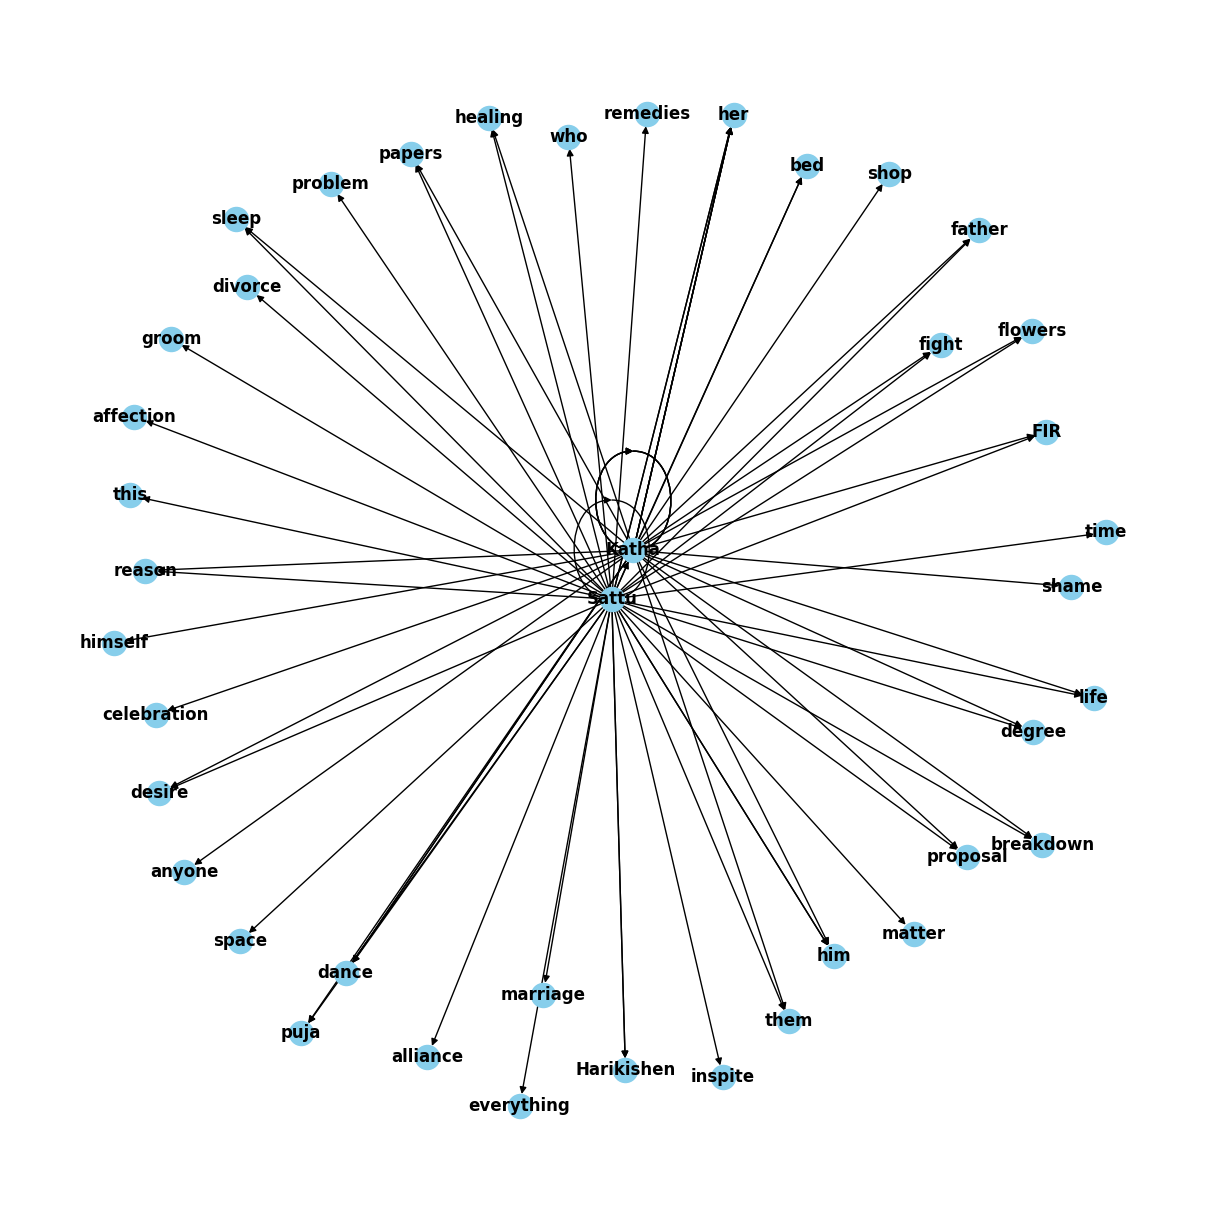

In [143]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

## Animal

In [145]:
text2= """
Ranvijay "Vijay" Singh is the son of Balbir Singh, a powerful Delhi-based industrialist. Despite Balbir being a strict father, Vijay's love for his father is deep and abiding. Balbir doesn't know about his son's devotion for him due to his busy schedule, which also keeps him from spending time with his family

One day, Balbir expels Vijay to a boarding school in the USA when Vijay threatens the bullies of his elder sister Reet with an AK-47. Vijay finishes his education and returns home after several years. During Balbir's birthday party, Vijay gets into an argument with his brother-in-law Varun, prompting Balbir to expel him from the house again. Vijay marries his childhood girlfriend Geetanjali from a Telugu family and the couple cuts ties with their families and moves to the USA. Eight years later, Vijay, Geetanjali and their two kids return to India upon learning that Balbir had an assassination attempt. After meeting his father, Vijay reconciles with his family and takes it upon himself to uncover the assassin's identity. He rounds up his second cousins from the village for backup and recruits a body double for his father, who is eventually killed by a gangster named Asrar Haque. Vijay discovers Varun's role in the assassination attempt and kills him publicly at a conference with his cousins, where Asrar is also present.

Vijay and his cousins meet Freddy, an arms dealer at a hotel where Asrar arrives with his assailants to kill Vijay. Vijay takes them all down with a machine gun and kills Asrar, but gets severely wounded and became bedridden with a damaged sense of hearing. He wakes up after two weeks and undergoes a heart transplant for his failing heart. Meanwhile, in Scotland, Asrar's brother Abrar Haque learns of his death during Abrar's third wedding and kills one of his men publicly at the wedding. Abrar and his other brother Abid go to a house where they shoot the man who was keeping tabs on Asrar revealing Abrar was the one who planned the assassination attempt on Balbir. Vijay recuperates after several months and is approached by Zoya, the fiancée of his heart donor. Vijay starts an extramartial affair with Zoya, who eventually reveals that she was sent by Abrar to honey trap him, so that one of his brothers who transformed himself into another Vijay, would kill his family, but Vijay reveals that he had already knew this and played along to learn the mastermind's identity.

Vijay learns from his grandfather Rajdheer Singh that Abrar and his brothers are Vijay's second cousins. They are the grandchildren of Shamsher Singh, Rajdheer's younger brother. Rajdheer had renounced Shamsher for his immoral antics. Shamsher's son Azim, who had converted to Islam and married a couple of times, was denied any share in Balbir's assets, which prompted Shamsher to commit suicide by setting himself on fire. Abrar, who had witnessed his grandfather's suicide, became mute from the trauma. Vijay then reveals to Geethanjali about the affair with Zoya and she becomes depressed and angry at Vijay but the two put aside their differences.

Vijay with his cousins stops Abrar, who is about to escape the country in a private jet with Abid. A violent fistfight ensues on the runway for a couple of hours. Vijay requests Abrar to stop targeting Balbir to which he denies. At the end of the fight Vijay brutally slits Abrar's throat, thereby putting an end to the chapter.

Back in India during Diwali, Balbir reveals that he has stage 4 ALL with only a few months left to live. He realises that his lack of love for his son has always been the root cause of Vijay's aggression. Balbir finally apologises to Vijay who bitterly cries in the pain of losing his father, the one whom he loved more than anyone. At this time, Geetanjali leaves Vijay for USA with their children, but their son Abhay runs back to Vijay.

In a mid-credits scene, Aziz Haque, a butcher in Istanbul and the youngest of the Haque brothers, is revealed as the one who underwent plastic surgery to resemble another Vijay. Zoya and Abid are with him and Zoya is revealed to be pregnant, though unsure whether the child's father is Aziz or Vijay. After butchering two of Vijay's cousins brutally, Aziz sets out with Abid to exact revenge for the deaths of their two elder brothers.
"""

# Process the text with SpaCy
doc = nlp(text2)


In [149]:


# Main characters (replace with actual main character names)
# Extract entities from the text
entities = [ent.text for ent in doc.ents]


# Initialize a dictionary to store extracted relations for each entity
extracted_relations = {entity: [] for entity in entities}

In [156]:


# Iterate over sentences in the text
for sent in doc.sents:

    # Iterate over main characters
    for main_character in entities:
#         print(main_character)
        # Check if the main character is mentioned in the sentence
        if main_character in sent.text:
            # Extract relations using SpaCy's dependency parsing
            for token in sent:
                # Check if the token is a verb (action) related to the main character
#                 print(token)
                if token.pos_ == "VERB":
                    # Extract the relation (verb) and its object
                    relation = token.text
                    obj = [child.text for child in token.children if child.dep_ == "dobj"]
                    if obj:
                        extracted_relations[main_character].append((main_character, relation, obj[0]))

                        

In [158]:
# extracted_relations

     source   target        edge
0     Vijay      him       keeps
1     Vijay     time    spending
2     Vijay    Vijay      expels
3     Vijay  bullies   threatens
4     Vijay      him       keeps
...     ...      ...         ...
3605   Aziz    Vijay    resemble
3606   Aziz      two  butchering
3607   Aziz  revenge       exact
3608   Aziz      two  butchering
3609   Aziz  revenge       exact

[3610 rows x 3 columns]


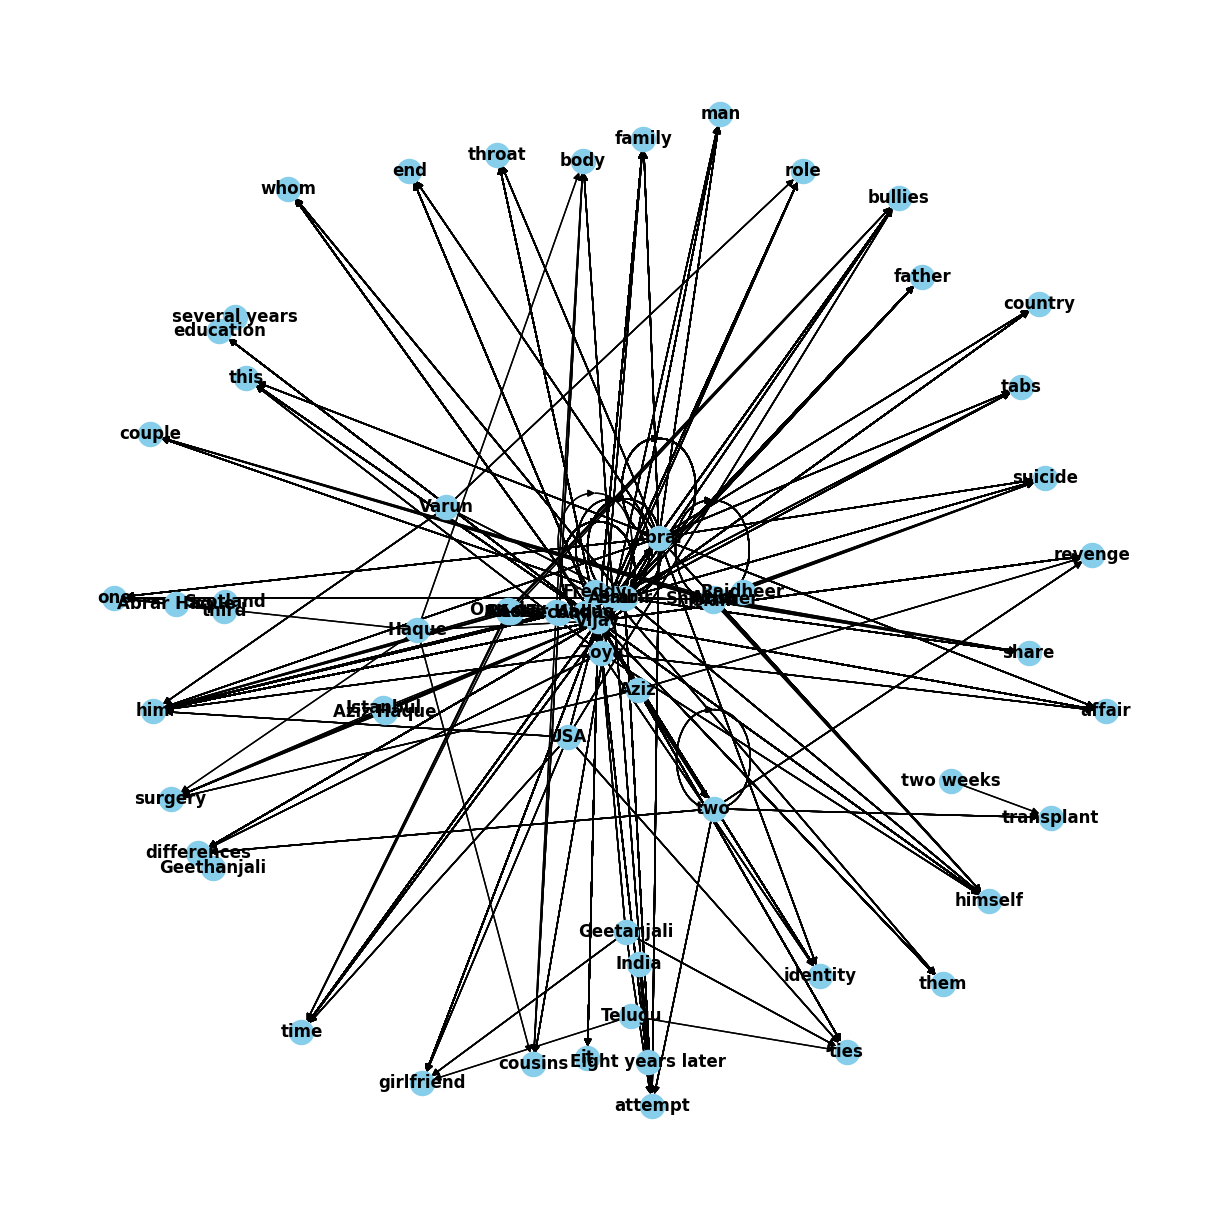

In [159]:

                        
# Initialize lists to store data for the DataFrame
sources = []
destinations = []
relation_types = []

# Iterate over entities and their relations
for entity, relations in extracted_relations.items():
    for relation in relations:
        # Add source entity, destination entity, and relation type to the lists
        sources.append(relation[0])
        destinations.append(relation[2])
        relation_types.append(relation[1])

# Create DataFrame from the lists
df_relations = pd.DataFrame({'source': sources, 'target': destinations, 'edge': relation_types})

# Display the DataFrame
print(df_relations)



In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(df_relations, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()

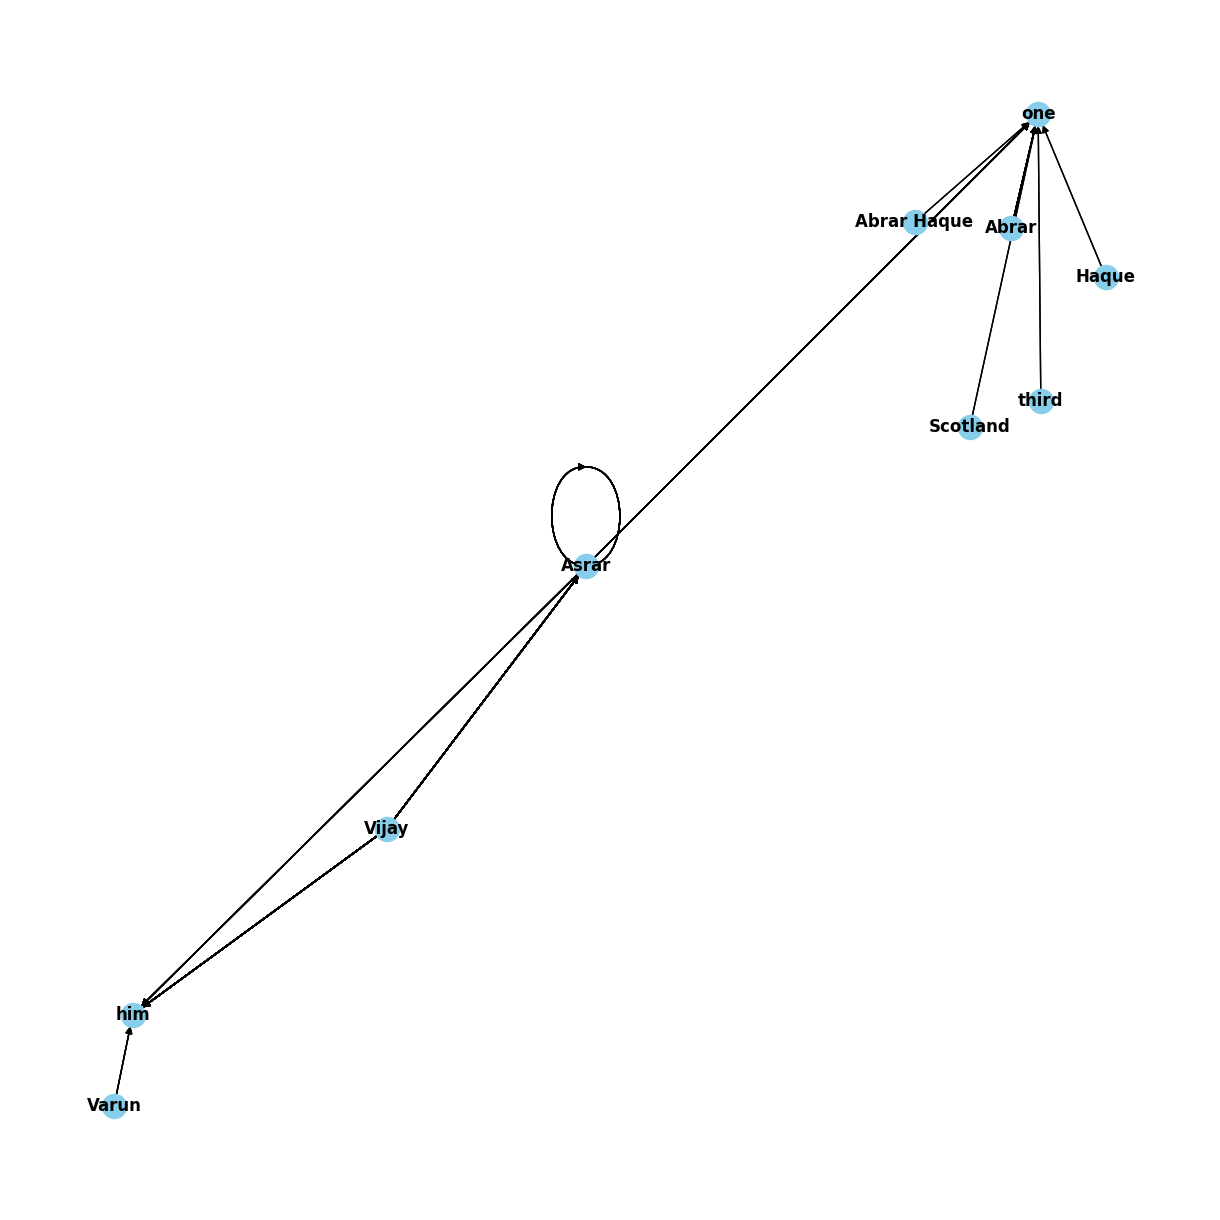

In [161]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(df_relations[df_relations['edge']=='kills'], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
plt.show()